In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/sample_data/heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='target', ylabel='count'>

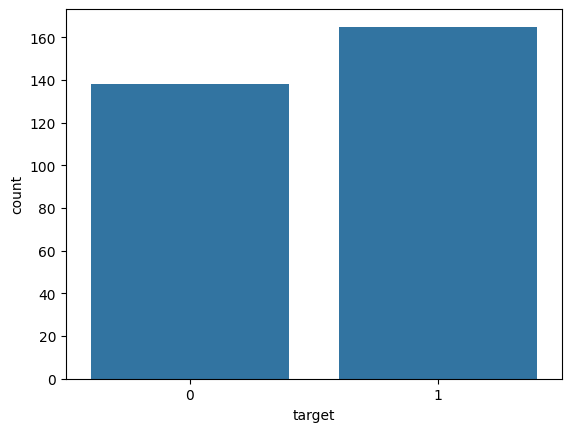

In [8]:
sns.countplot(x='target', data=df)

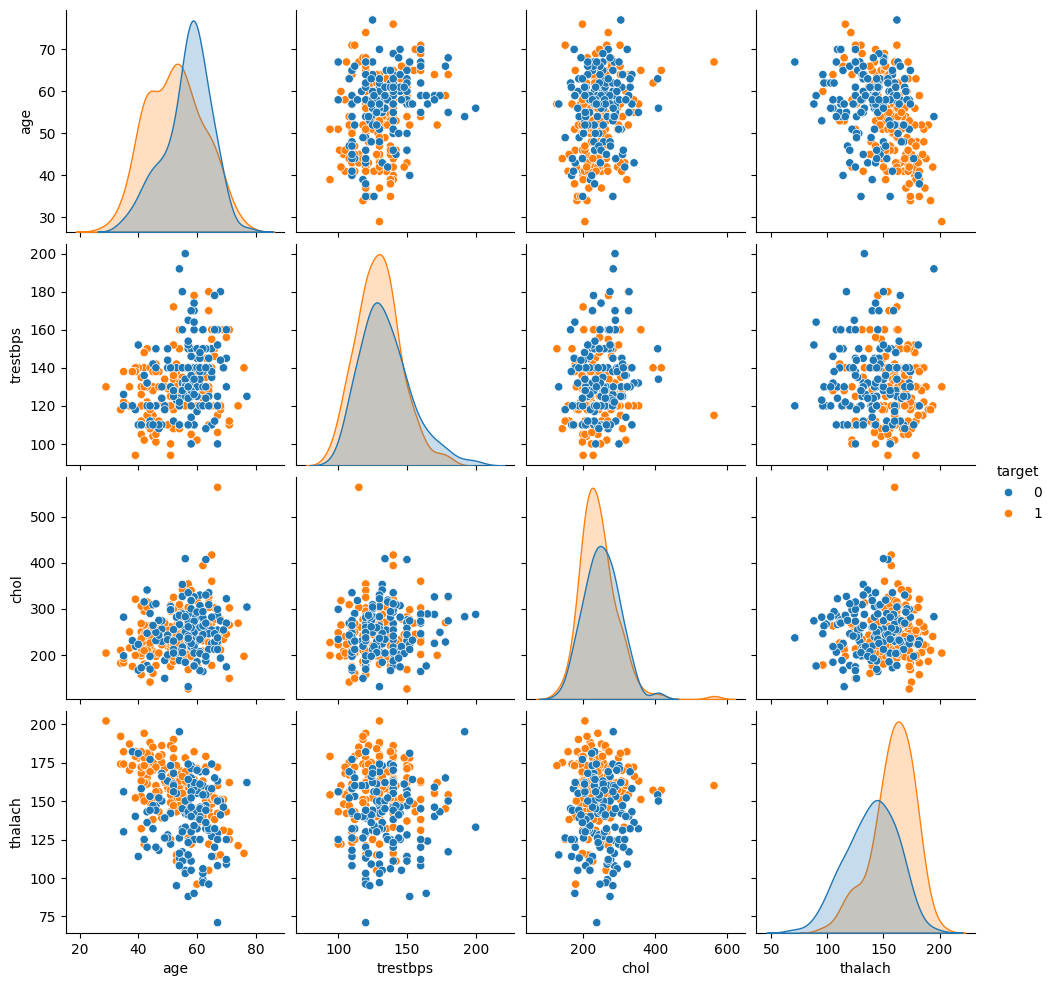

In [14]:
sns.pairplot(df[['age','trestbps','chol','thalach','target']], hue='target')

<Axes: >

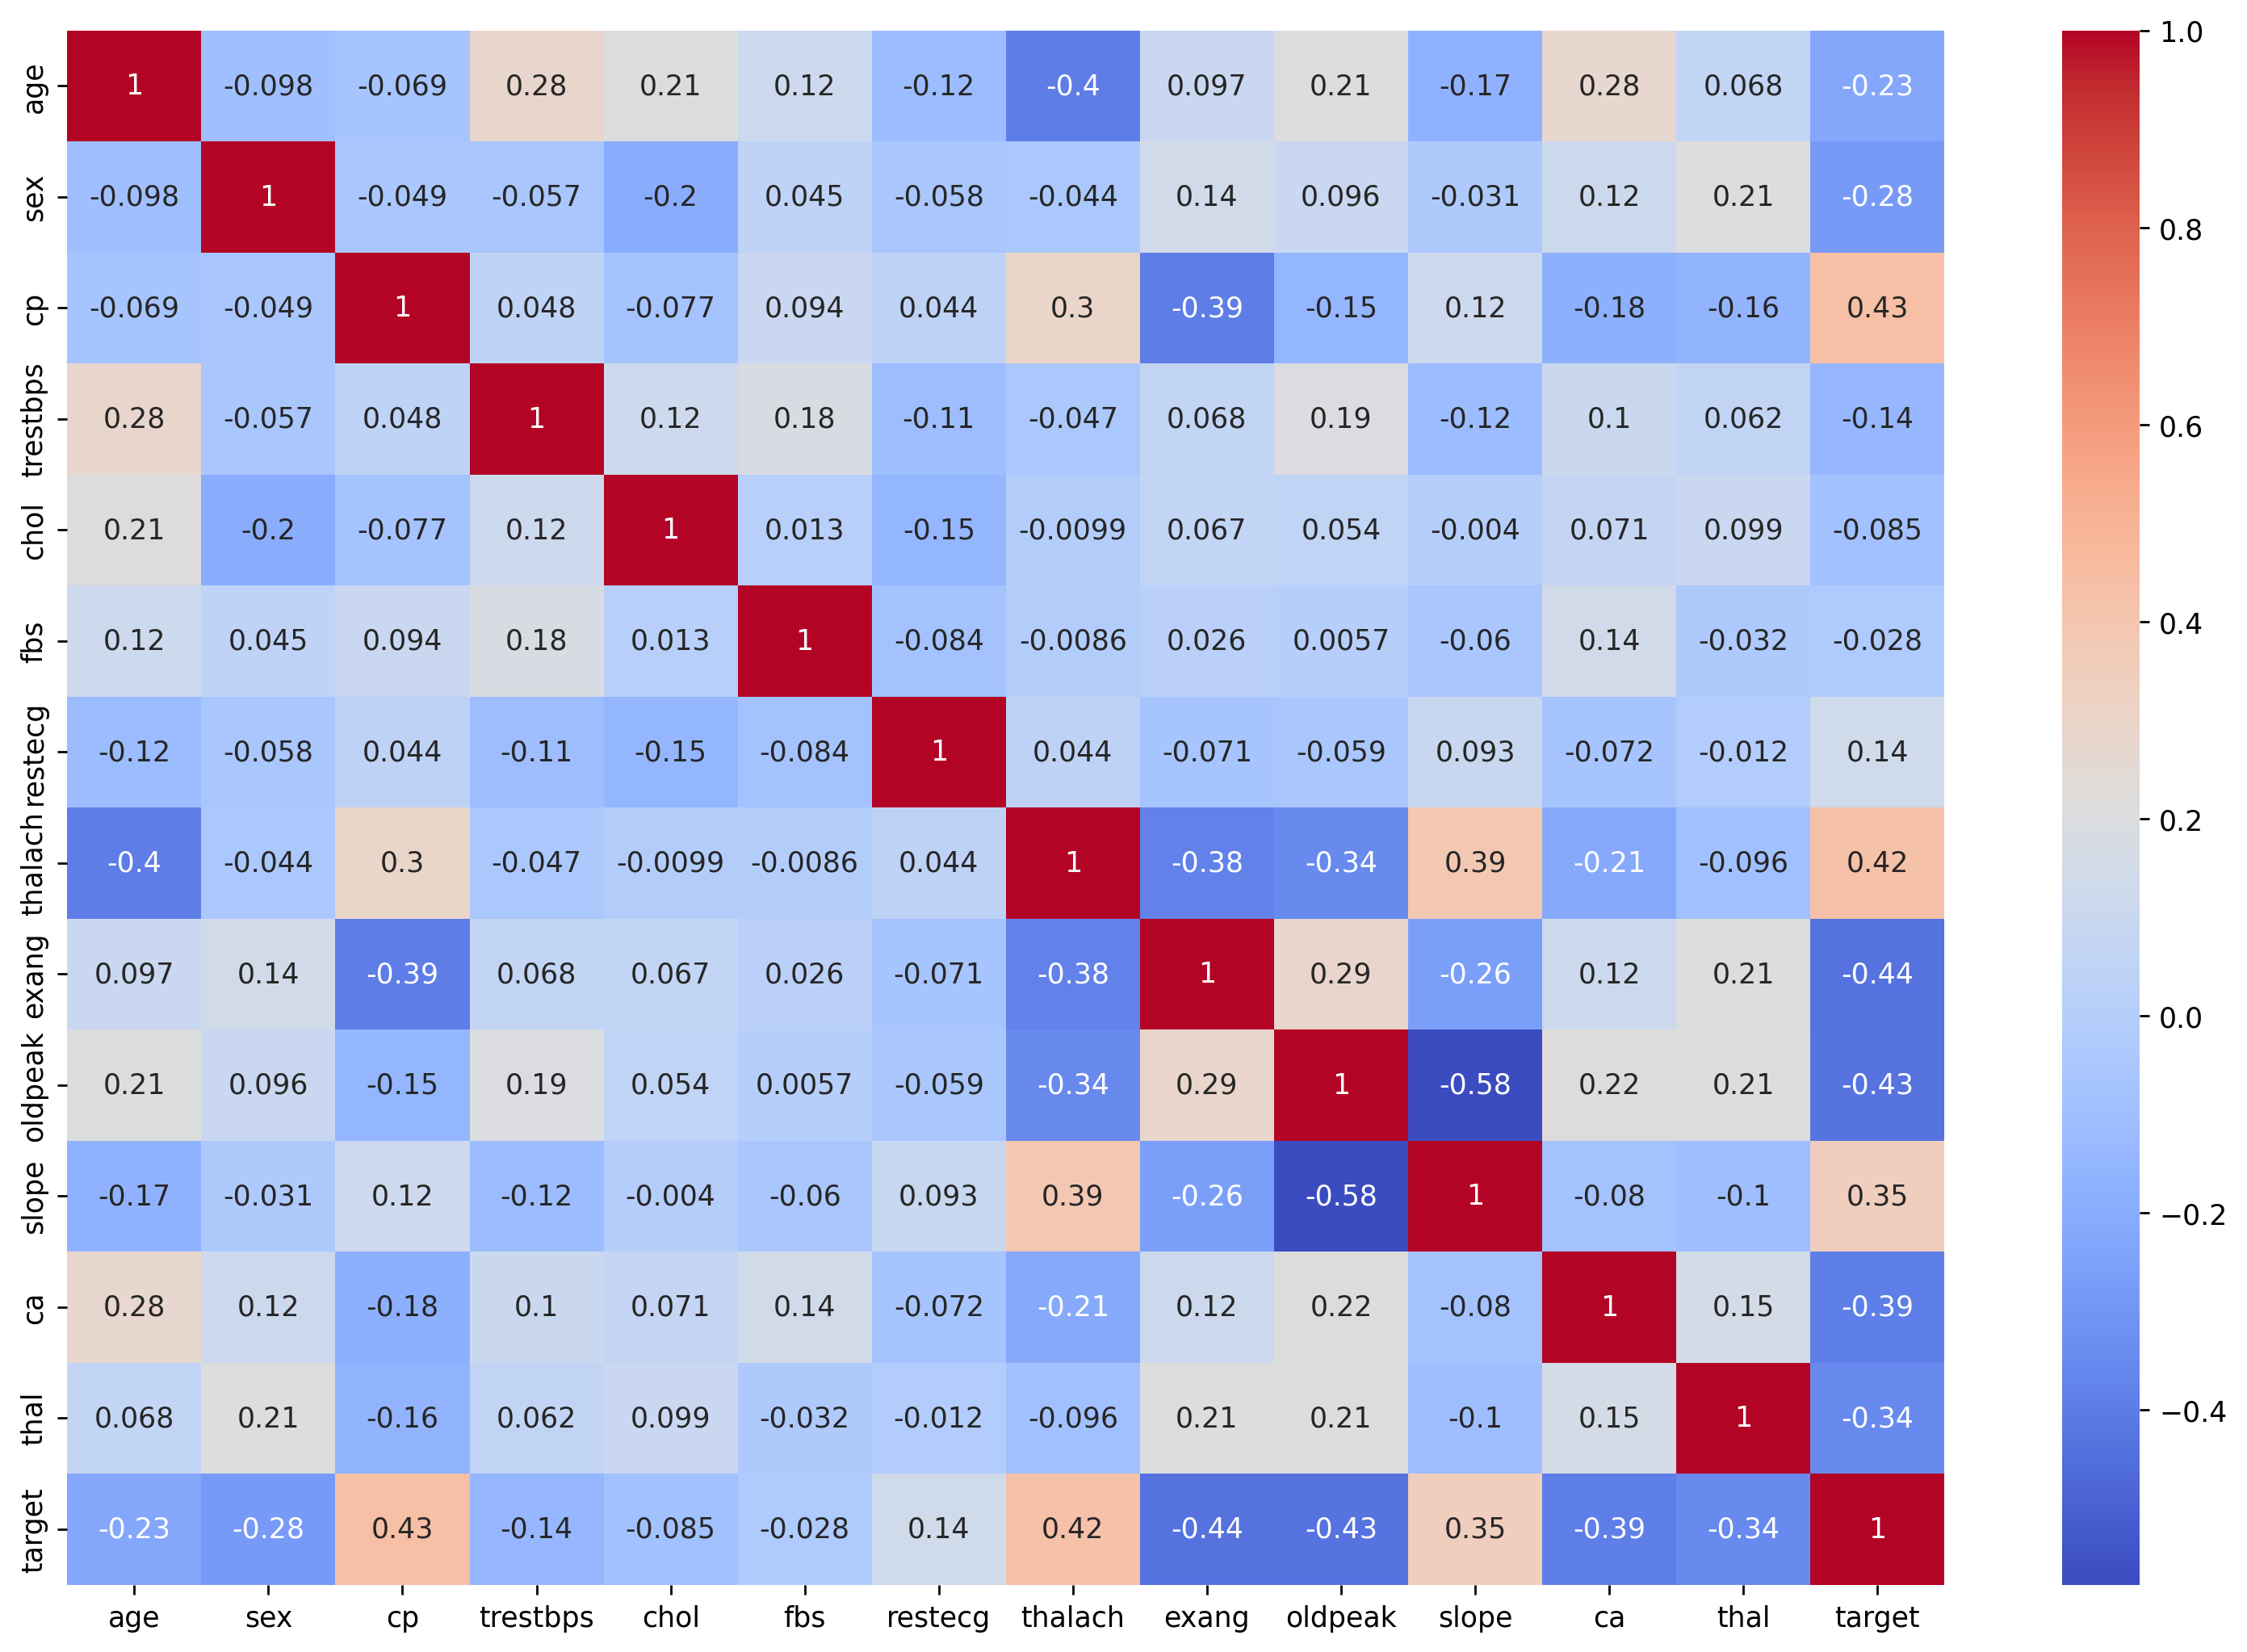

In [18]:
plt.figure(figsize=(15,10),dpi=250)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
X_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.1, random_state=101)

In [23]:
scaler = StandardScaler()

In [24]:
X_train_t = scaler.fit_transform(X_train)
x_test_t = scaler.transform(x_test)

In [31]:
from sklearn.linear_model import LogisticRegressionCV


In [33]:
log_mod = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', solver='liblinear')

In [34]:
log_mod.fit(X_train_t, y_train)

LogisticRegressionCV(cv=5, solver='liblinear')

In [39]:
y_pred=log_mod.predict(x_test_t)

In [42]:
log_mod.C_

array([2.7825594])

In [40]:
log_mod.coef_

array([[-0.06833845, -0.76634966,  0.92411081, -0.27435654, -0.22670131,
         0.04665183,  0.12333577,  0.44679971, -0.43415158, -0.53922063,
         0.39429395, -0.88156868, -0.59012232]])

In [50]:
coefs = pd.DataFrame(index=X_train.columns,data=log_mod.coef_[0])

In [51]:
coefs

,0
age,-0.068338
sex,-0.766350
cp,0.924111
trestbps,-0.274357
chol,-0.226701
fbs,0.046652
restecg,0.123336
thalach,0.446800
exang,-0.434152
oldpeak,-0.539221


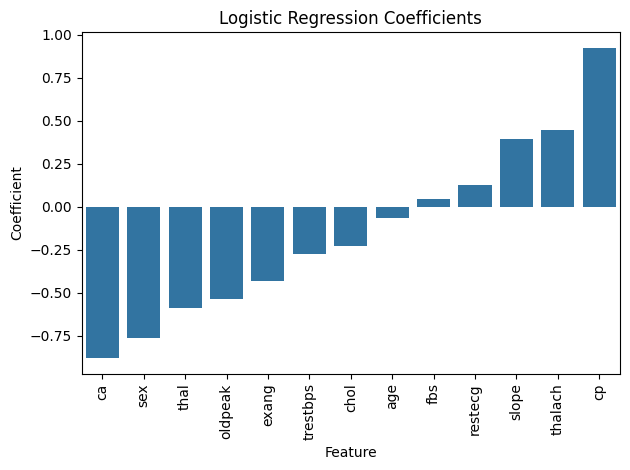

In [53]:
coefs_df = coefs.reset_index()
coefs_df = coefs_df.sort_values(by=0)
coefs_df.columns = ['Feature', 'Coefficient']
sns.barplot(data=coefs_df, x='Feature', y='Coefficient')
plt.xticks(rotation=90)
plt.title('Logistic Regression Coefficients')
plt.tight_layout()
plt.show()

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [56]:
print(classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [57]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]])

In [60]:
from sklearn.metrics import RocCurveDisplay, precision_recall_curve

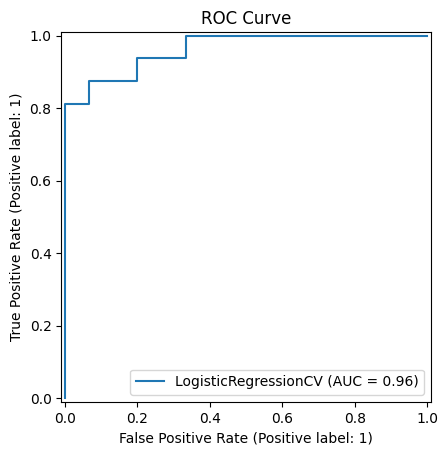

In [61]:
RocCurveDisplay.from_estimator(log_mod, x_test_t, y_test)
plt.title('ROC Curve')
plt.show()

In [64]:
patient = [[54.,1.,0.,122.,286.,0.,0.,116.,1.,3.2,1.,2.,2.]]

In [65]:
log_mod.predict(patient)

array([0])

In [66]:
log_mod.predict_proba(patient)

array([[1.00000000e+00, 8.10047952e-25]])